<a href="https://colab.research.google.com/github/evelynzhang5/ECgMLP/blob/main/Copy_of_ECgMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


%%bash
# 1. Make sure no half‑installed wheel remains
pip uninstall -y tensorflow-addons

# 2. Build from GitHub with CUDA kernels *disabled* (fast, rarely fails)
TF_ADDONS_NO_CUDA=1 pip install --no-binary :all: --no-deps \
    "git+https://github.com/tensorflow/addons.git@master"



  Cloning https://github.com/tensorflow/addons.git (to revision master) to /tmp/pip-req-build-ymsra2v_
  Resolved https://github.com/tensorflow/addons.git to commit d208d752e98c310280938efa939117bf635a60a8
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tensorflow-addons: filename=tensorflow_addons-0.23.0.dev0-cp312-cp312-linux_x86_64.whl size=512724 sha256=ad57e3895c1b527795c77d6a5b0210ec30e1ba00da3356e8782a92231c26cd9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-r4e32w48/wheels/90/5a/85/3b85f06f1423c53b4718fc520f668e8f164ae6ac01fd8f2e8b
Successfully built tensorflow-addons


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/addons.git /tmp/pip-req-build-ymsra2v_


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split



/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.19.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-addons==0.23.0 \
            scikit-image opencv-python scikit-learn


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !mkdir -p /content/local_train
# !mkdir -p /content/local_val

# !cp -r "/content/drive/MyDrive/augmented_dataset/train/." "/content/local_train/"
# !cp -r "/content/drive/MyDrive/augmented_dataset/val/." "/content/local_val/"

# !mkdir -p /content/local_test
# !cp -r "/content/drive/MyDrive/test_dataset/." "/content/local_test/"

# !cp -r "/content/drive/MyDrive/augmented_dataset/val/." "/content/local_val/"

Mounted at /content/drive


In [ ]:
import requests


url = "https://figshare.com/ndownloader/files/13496366"
response = requests.get(url, stream=True)

with open("endometrium_dataset.zip", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00


In [ ]:
import zipfile

with zipfile.ZipFile("endometrium_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("endometrium_dataset")


In [ ]:
import os

root_dir = "endometrium_dataset"

for root, dirs, files in os.walk(root_dir):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files[:5]}")  # print first 5 files for a quick peek
    print()
    break  # only print top-level info


Root: endometrium_dataset
Dirs: ['histopathological image dataset for ET']
Files: []



**Image Preprocessing**


*  Normalization, Alpha-Beta, and Non-Local Means (NLM)




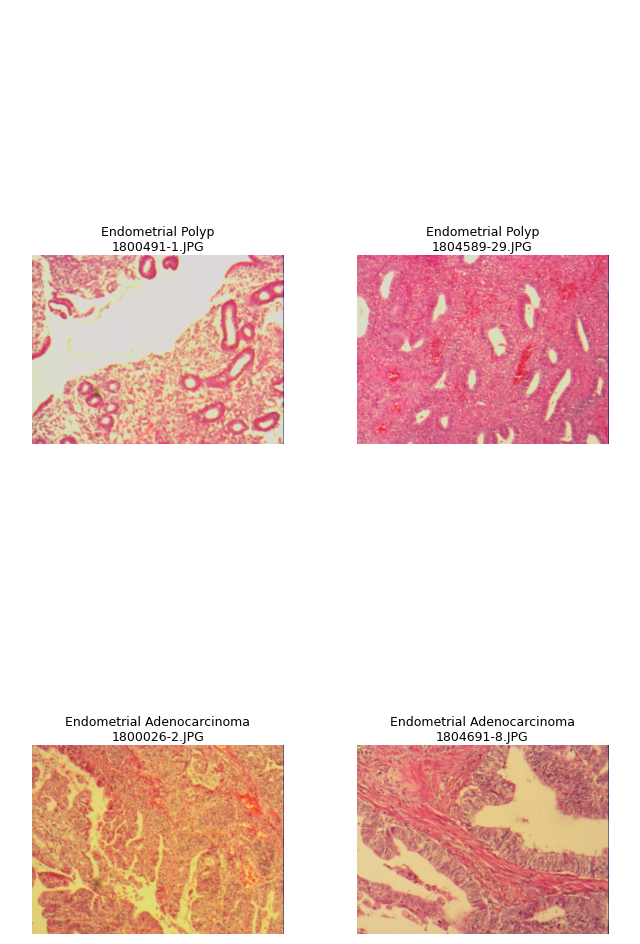

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_root = "/content/drive/MyDrive/endometrium_dataset/histopathological image dataset for ET"

# Main class folders (as named in your dataset)
class_folders = {
    "NE": "Normal Endometrium",
    "EP": "Endometrial Polyp",
    "EH": "Endometrial Hyperplasia",
    "EA": "Endometrial Adenocarcinoma"
}

# How many images per class to show
num_images_per_class = 2

# Set compact figure size based on image count
fig, axes = plt.subplots(len(class_folders), num_images_per_class, figsize=(num_images_per_class * 4, len(class_folders) * 3))

# Iterate through class folders
for row_idx, (folder_name, class_label) in enumerate(class_folders.items()):
    folder_path = os.path.join(dataset_root, folder_name)
    all_images = [f for f in os.listdir(folder_path) if f.lower().endswith(".jpg") or f.lower().endswith(".jpeg")]
    selected = random.sample(all_images, min(num_images_per_class, len(all_images)))

    for col_idx in range(num_images_per_class):
        ax = axes[row_idx, col_idx]
        ax.axis("off")

        if col_idx < len(selected):
            img_name = selected[col_idx]
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(f"{class_label}\n{img_name}", fontsize=9, pad=3)

# Remove whitespace and adjust spacing
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


In [ ]:
import cv2
import numpy as np
from PIL import Image
from skimage.restoration import denoise_nl_means, estimate_sigma

from PIL import Image
import numpy as np
import cv2
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
def preprocess_image_rgb(image_pil: Image.Image, visualize=False) -> np.ndarray:
    from skimage.restoration import denoise_nl_means, estimate_sigma
    from skimage.util import img_as_float, img_as_ubyte

    img_np = np.array(image_pil.convert("RGB"))  # RGB (H, W, 3)

    # Normalize to [0, 255]
    normalized = cv2.normalize(img_np, None, 0, 255, cv2.NORM_MINMAX)

    # Alpha-Beta (contrast and brightness)
    alpha_beta = cv2.convertScaleAbs(normalized, alpha=1.0, beta=2)

    # Convert to float
    float_image = img_as_float(alpha_beta)

    # Estimate sigma and denoise in RGB
    sigma_est = np.mean(estimate_sigma(float_image, channel_axis=-1))
    denoised = denoise_nl_means(
        float_image,
        h=0.8 * sigma_est,
        patch_size=7,
        patch_distance=11,
        channel_axis=-1
    )

    denoised_uint8 = img_as_ubyte(denoised)

    if visualize:
        fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        axs[0].imshow(img_np)
        axs[0].set_title("Original RGB")
        axs[1].imshow(normalized)
        axs[1].set_title("Normalized")
        axs[2].imshow(alpha_beta)
        axs[2].set_title("Alpha-Beta")
        axs[3].imshow(denoised_uint8)
        axs[3].set_title("Denoised")
        for ax in axs:
            ax.axis("off")
        plt.tight_layout()
        plt.show()

    return denoised_uint8


In [ ]:
import os
from PIL import Image
from tqdm import tqdm


# === I/O Paths ===
input_root = "/content/drive/MyDrive/endometrium_dataset/histopathological image dataset for ET"
output_root = "/content/drive/MyDrive/preprocessed_dataset"
segment_root = "/content/drive/MyDrive/segment_dataset"
os.makedirs(output_root, exist_ok=True)
os.makedirs(segment_root, exist_ok=True)
# === Collect all image paths recursively ===
image_paths = []
for root, _, files in os.walk(input_root):
    for fname in files:
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            input_img_path = os.path.join(root, fname)
            relative_path = os.path.relpath(input_img_path, input_root)
            output_img_path = os.path.join(output_root, relative_path)
            image_paths.append((input_img_path, output_img_path))

# === Process all images with progress bar ===
for input_path, output_path in tqdm(image_paths, desc="Preprocessing images"):
    try:
        # Make sure output subdirectory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Load, preprocess, and save
        img = Image.open(input_path).convert("RGB")
        processed = preprocess_image_rgb(img)
        Image.fromarray(processed).save(output_path)

    except Exception as e:
        print(f"⚠️ Error processing {input_path}: {e}")


Preprocessing images: 100%|██████████| 3302/3302 [1:02:58<00:00,  1.14s/it]


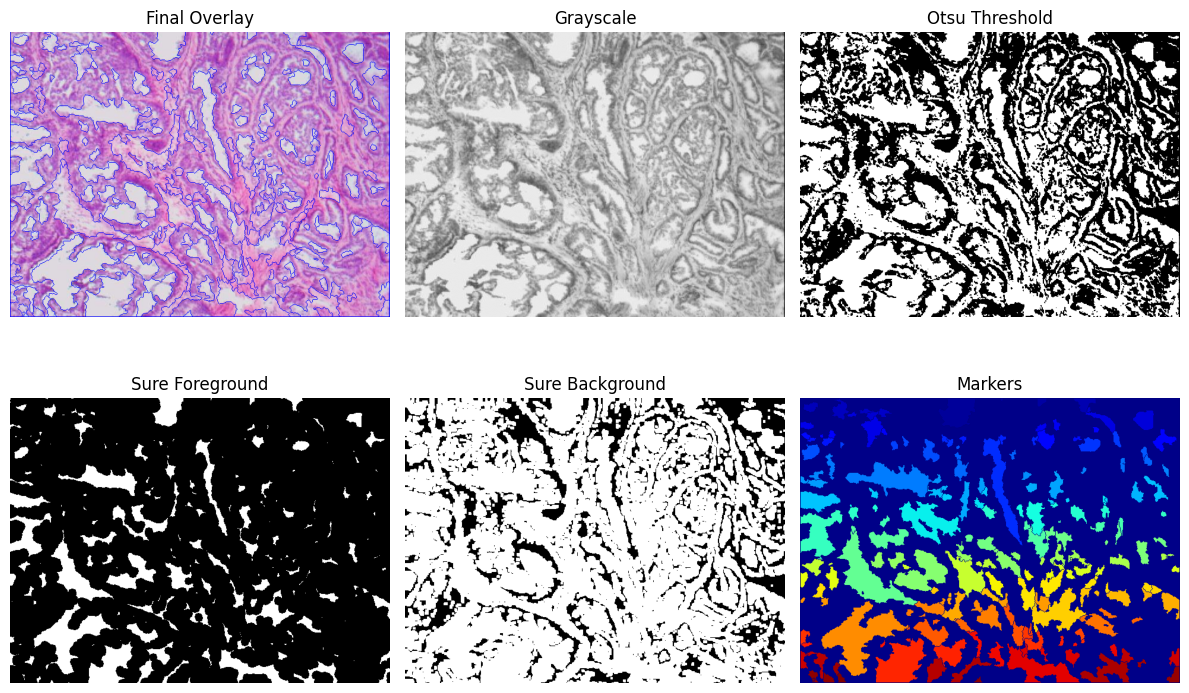

In [ ]:

from PIL import Image

img = Image.open("/content/drive/MyDrive/preprocessed_dataset/EA/1510326.JPG")
overlay, steps = apply_ecgmlp_watershed(img, visualize=True)



show_segmentation_steps(overlay, steps)


In [ ]:
 # Load the image manually
img_path = "/content/drive/MyDrive/preprocessed_dataset/EA/1805156(3).JPG"

try:
    image = Image.open(img_path).convert("RGB")
    processed = preprocess_image_rgb(image, visualize=True)
except Exception as e:
    print(f"Failed to process manually: {e}")



Failed to process manually: [Errno 2] No such file or directory: '/content/drive/MyDrive/preprocessed_dataset/EA/1805156(3).JPG'


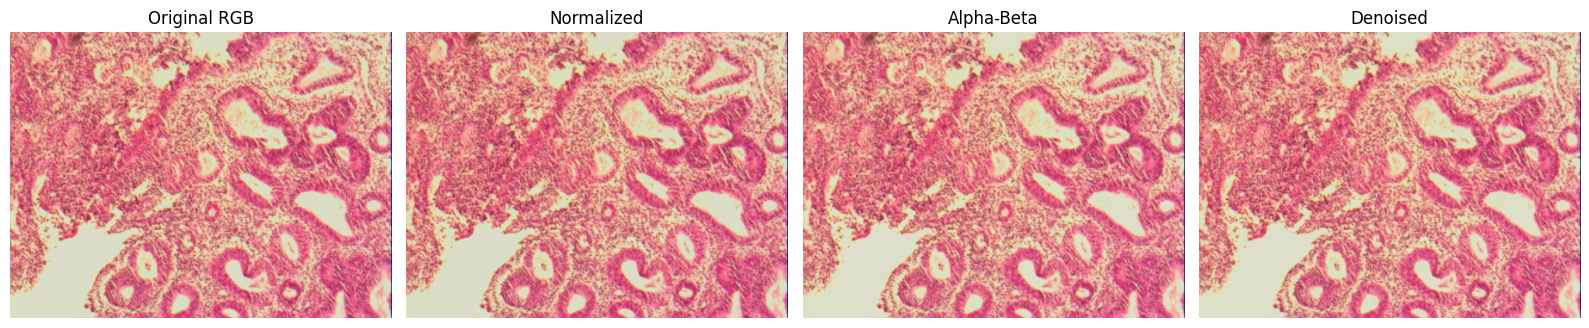

array([[[239, 139, 147],
        [232, 136, 140],
        [215, 124, 123],
        ...,
        [195, 147, 187],
        [119,  97, 162],
        [  8,   2,  77]],

       [[242, 142, 150],
        [235, 139, 143],
        [220, 129, 128],
        ...,
        [216, 165, 206],
        [143, 121, 186],
        [ 30,  22,  99]],

       [[246, 146, 154],
        [236, 140, 144],
        [223, 134, 130],
        ...,
        [192, 142, 180],
        [118,  93, 158],
        [  2,   2,  66]],

       ...,

       [[221, 223, 201],
        [221, 223, 201],
        [221, 223, 201],
        ...,
        [234, 225, 226],
        [178, 207, 221],
        [ 15,  63,  83]],

       [[221, 223, 201],
        [221, 223, 201],
        [221, 223, 201],
        ...,
        [211, 208, 203],
        [136, 170, 179],
        [  2,  34,  47]],

       [[221, 223, 201],
        [221, 223, 201],
        [221, 223, 201],
        ...,
        [219, 219, 211],
        [159, 198, 203],
        [ 28,  86,  97]]], dtype=uint8)
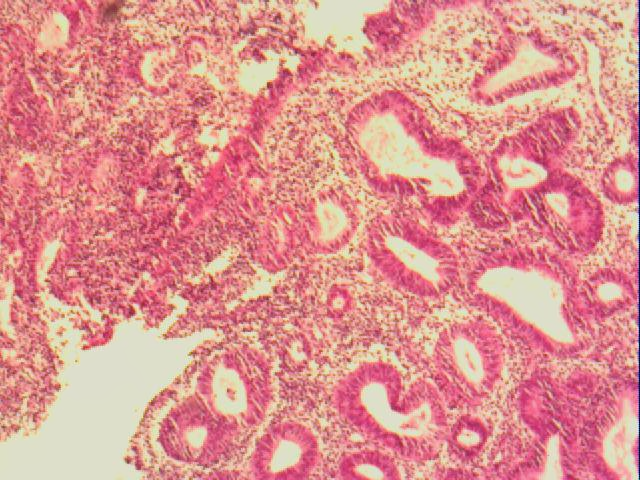

In [ ]:
img = Image.open("/content/drive/MyDrive/endometrium_dataset/histopathological image dataset for ET/NE/Follicular/0118-10.JPG")
preprocess_image_rgb(img, visualize=True)


In [ ]:
import os
from collections import defaultdict

# Root directory containing class folders (EA, EH, EP, NE)
root_dir = "/content/patches_split/train"

# Image file extensions to count
image_exts = (".jpg", ".jpeg", ".png")

# Dictionary to store counts
class_counts = defaultdict(int)

# Walk through the directory recursively
for dirpath, _, filenames in os.walk(root_dir):
    for fname in filenames:
        if fname.lower().endswith(image_exts):
            # Get the class label from the top-level folder inside segment_patches
            rel_path = os.path.relpath(dirpath, root_dir)
            class_label = rel_path.split(os.sep)[0]
            class_counts[class_label] += 1

# Print the results
print("📊 Image count per class:")
for label in sorted(class_counts.keys()):
    print(f"- {label}: {class_counts[label]} images")


📊 Image count per class:
- EA: 8316 images
- EH: 7592 images
- EP: 8848 images
- NE: 16328 images


Segmentation

*  Otsu's Thresholding, Morphological Closing, Distance Transform, Dilation (sure background),Thresholding (sure foreground), Finding Unknown Region,
 Marker Labelling, Applying Watershed, Highlighting Borders



In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import numpy as np
from PIL import Image

def apply_ecgmlp_watershed(img, visualize=False):
    if isinstance(img, Image.Image):
        img = np.array(img.convert("RGB"))

    if img.dtype != np.uint8 or img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Image must be RGB with dtype=uint8.")

    # Convert to OpenCV BGR and grayscale
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Step 1: Otsu's Thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 2: Morphological Closing with 2×2 kernel
    kernel_close = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel_close, iterations=2)

    # Step 3: Distance Transform
    dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)

    # Step 4: Dilation to get sure background
    sure_bg = cv2.dilate(closing, kernel_close, iterations=3)

    # Step 5: Threshold distance map to get sure foreground (30% of max)
    _, sure_fg = cv2.threshold(dist_transform, 0.17 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Step 6: Unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 7: Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0

    # Step 8: Watershed
    markers = cv2.watershed(img_bgr, markers)

    # Step 9: Overlay boundaries in blue
    overlay = img.copy()
    overlay[markers == -1] = [0, 0, 255]  # Blue boundary

    if visualize:
        return overlay, {
            "gray": gray,
            "thresh": thresh,
            "closing": closing,
            "dist_transform": dist_transform,
            "sure_fg": sure_fg,
            "sure_bg": sure_bg,
            "unknown": unknown,
            "markers": markers,
        }

    return overlay


In [ ]:
image_paths = []
for root, _, files in os.walk(input_root):
    for fname in files:
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            input_img_path = os.path.join(root, fname)
            relative_path = os.path.relpath(input_img_path, input_root)
            output_img_path = os.path.join(output_root, os.path.splitext(relative_path)[0] + "_seg.png")
            image_paths.append((input_img_path, output_img_path))

# Run segmentation
for input_path, output_path in tqdm(image_paths, desc="Saving segmented outputs"):
    try:
        img = Image.open(input_path).convert("RGB")
        segmented = apply_ecgmlp_watershed(img)

        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        Image.fromarray(segmented).save(output_path)
    except Exception as e:
        print(f"⚠️ Error processing {input_path}: {e}")


Saving segmented outputs: 100%|██████████| 3302/3302 [09:55<00:00,  5.55it/s]


Data Augmentation -10 photometric augmentations per segmented img

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Source and target roots
SOURCE_ROOTS = [
    "/content/drive/MyDrive/segment_dataset"
]
TARGET_ROOT = "/content/drive/MyDrive/segment_augmented_dataset"

# Make sure target root exists
os.makedirs(TARGET_ROOT, exist_ok=True)

def increase_brightness(img, factor=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v + factor, 0, 255)
    return cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2RGB)

def decrease_brightness(img, factor=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v - factor, 0, 255)
    return cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2RGB)

def increase_contrast(img, factor=1.5):
    return np.clip((img - 127) * factor + 127, 0, 255).astype(np.uint8)

def decrease_contrast(img, factor=0.7):
    return np.clip((img - 127) * factor + 127, 0, 255).astype(np.uint8)

def apply_clahe(img):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    return cv2.cvtColor(cv2.merge([l,a,b]), cv2.COLOR_LAB2RGB)

def increase_saturation(img, factor=1.5):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] = np.clip(hsv[:,:,1]*factor, 0, 255)
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

def decrease_saturation(img, factor=0.7):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] = np.clip(hsv[:,:,1]*factor, 0, 255)
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

def shift_hue(img, delta=10):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.int32)
    hsv[:,:,0] = (hsv[:,:,0] + delta) % 180
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

def gaussian_blur(img, ksize=5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def combined_brightness_contrast(img):
    return increase_contrast(increase_brightness(img, 20), 1.3)

# 10 augmentations
AUGMENTATIONS = [
    increase_brightness,
    decrease_brightness,
    increase_contrast,
    decrease_contrast,
    apply_clahe,
    increase_saturation,
    decrease_saturation,
    shift_hue,
    gaussian_blur,
    combined_brightness_contrast
]

def augment_and_save(image, save_dir, base_name):
    """
    Applies 10 augmentations to the image and saves them.
    """
    for i, aug_fn in enumerate(AUGMENTATIONS):
        aug_img = aug_fn(image.copy())
        save_path = os.path.join(save_dir, f"{base_name}_aug{i+1}.jpg")
        cv2.imwrite(save_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

# Main process
for src_root in SOURCE_ROOTS:
    split = os.path.basename(src_root)
    for dirpath, _, filenames in os.walk(src_root):
        rel_path = os.path.relpath(dirpath, src_root)
        target_dir = os.path.join(TARGET_ROOT, split, rel_path)
        os.makedirs(target_dir, exist_ok=True)

        for fname in tqdm(filenames, desc=f"Augmenting {rel_path}"):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            src_path = os.path.join(dirpath, fname)
            img = cv2.imread(src_path)
            if img is None:
                print(f"⚠️ Could not read: {src_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            base_name, _ = os.path.splitext(fname)
            augment_and_save(img, target_dir, base_name)

print("\n✅ All augmentations complete!")


Augmenting .: 0it [00:00, ?it/s]
Augmenting EA: 100%|██████████| 374/374 [01:52<00:00,  3.31it/s]
Augmenting EH: 0it [00:00, ?it/s]
Augmenting EP: 100%|██████████| 445/445 [02:16<00:00,  3.27it/s]
Augmenting NE: 0it [00:00, ?it/s]
Augmenting NE/Menstrual: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
Augmenting .: 0it [00:00, ?it/s]
Augmenting EA: 100%|██████████| 107/107 [00:32<00:00,  3.32it/s]
Augmenting EH: 0it [00:00, ?it/s]
Augmenting EP: 100%|██████████| 127/127 [00:40<00:00,  3.17it/s]
Augmenting NE: 0it [00:00, ?it/s]
Augmenting NE/Menstrual: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]


✅ All augmentations complete!


Data Spliting - test 10% train+val 90%(put into model)

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

# Paths
PATCH_DIR = "/content/drive/MyDrive/segment_dataset"
OUT_DIR = "/content/drive/MyDrive/segment_split_dataset"

# Config
CATEGORIES = ["EA", "EH", "EP", "NE"]
split_ratio = [0.7, 0.2, 0.1]

# Create output dirs
for split in ["train", "val", "test"]:
    for cls in CATEGORIES:
        os.makedirs(os.path.join(OUT_DIR, split, cls), exist_ok=True)

# Gather all images with relative paths
all_samples = {cls: [] for cls in CATEGORIES}

for cls in CATEGORIES:
    class_path = os.path.join(PATCH_DIR, cls)
    for root, _, files in os.walk(class_path):
        for fname in files:
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                abs_path = os.path.join(root, fname)
                rel_subfolder = os.path.relpath(root, class_path)
                all_samples[cls].append( (abs_path, rel_subfolder) )

# Split and copy
for cls in CATEGORIES:
    random.shuffle(all_samples[cls])
    n_total = len(all_samples[cls])
    n_train = int(n_total * split_ratio[0])
    n_val   = int(n_total * split_ratio[1])
    n_test  = n_total - n_train - n_val

    splits = {
        "train": all_samples[cls][:n_train],
        "val": all_samples[cls][n_train:n_train+n_val],
        "test": all_samples[cls][n_train+n_val:]
    }

    for split in ["train", "val", "test"]:
        for src_path, rel_subfolder in tqdm(splits[split], desc=f"{cls} → {split}"):
            dst_dir = os.path.join(OUT_DIR, split, cls, rel_subfolder)
            os.makedirs(dst_dir, exist_ok=True)
            dst_path = os.path.join(dst_dir, os.path.basename(src_path))
            shutil.copy2(src_path, dst_path)


NE → test: 100%|██████████| 134/134 [02:02<00:00,  1.09it/s]


model training

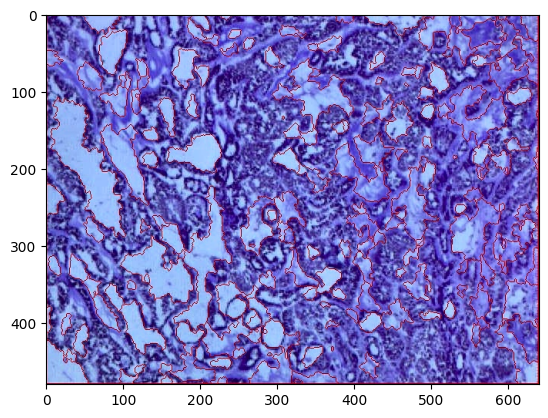

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/MyDrive/segment_augmented_dataset/combined"

CATEGORIES = ["EA", "EH", "EP", "NE"]


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

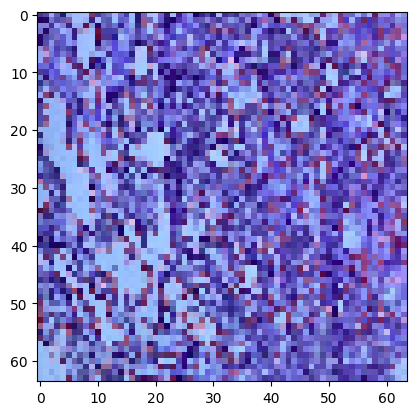

In [ ]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
import os
import cv2
from tqdm import tqdm

import os
import cv2
from tqdm import tqdm

training_data = []

def create_training_data():
    training_data.clear()
    category_counts = {cat: 0 for cat in CATEGORIES}

    for category in CATEGORIES:
        category_path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for root, dirs, files in os.walk(category_path):
            for file in tqdm(files, desc=f"Loading {category}"):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    try:
                        file_path = os.path.join(root, file)
                        img_array = cv2.imread(file_path)

                        # Skip unreadable images
                        if img_array is None:
                            continue

                        # Convert grayscale to RGB if needed
                        if len(img_array.shape) == 2 or img_array.shape[2] == 1:
                            img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

                        # Resize and store
                        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                        training_data.append([new_array, class_num])
                        category_counts[category] += 1
                    except Exception as e:
                        print(f"❌ Failed on {file_path}: {e}")

    # Show how many images were loaded per category
    print("\n📊 Image count per category:")
    for cat, count in category_counts.items():
        print(f"- {cat}: {count} images")

create_training_data()




Loading EA: 100%|██████████| 4810/4810 [01:28<00:00, 54.45it/s] 
Loading EH: 0it [00:00, ?it/s]
Loading EP: 100%|██████████| 5720/5720 [05:17<00:00, 18.00it/s] 
Loading NE: 0it [00:00, ?it/s]
Loading NE: 100%|██████████| 190/190 [00:05<00:00, 34.25it/s] 


📊 Image count per category:
- EA: 4810 images
- EH: 7170 images
- EP: 5720 images
- NE: 11990 images


In [ ]:
!nvidia-smi          # should list a Tesla T4 / P100 / V100, not “No devices found”



Mon Aug 25 21:11:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# TensorFlow
import tensorflow as tf
print("TF version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

# PyTorch
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))



TF version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Torch version: 2.8.0+cu126
CUDA available: True
Device count: 1
2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
%%bash

# 1 Remove every old TF‑related wheel (avoids ABI clashes)
pip uninstall -y tensorflow tf-keras tensorflow-decision-forests tensorflow-text

# 2 Install the first Python‑3.11 GPU series
pip install -U "tensorflow==2.18.*"



Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Found existing installation: tensorflow_decision_forests 1.12.0
Uninstalling tensorflow_decision_forests-1.12.0:
  Successfully uninstalled tensorflow_decision_forests-1.12.0
Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, which is not installed.


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X) / 255
X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [ ]:

num_classes = 4
input_shape = (64, 64, 3)

(x_train, x_test, y_train, y_test) = train_test_split(X, y,
    test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (23752, 64, 64, 3) - y_train shape: (23752,)
x_test shape: (5938, 64, 64, 3) - y_test shape: (5938,)


In [ ]:
weight_decay = 0.0001
batch_size = 128
num_epochs = 100
dropout_rate = 0.1
image_size = 128  # We'll resize input images to this size.
patch_size = 8  # Size of the patches to be extracted from the input images.
num_patches = (image_size // patch_size) ** 2  # Size of the data array.
embedding_dim = 256  # Number of hidden units.
num_blocks = 4  # Number of blocks.

print(f"Image size: {image_size} X {image_size} = {image_size ** 2}")
print(f"Patch size: {patch_size} X {patch_size} = {patch_size ** 2} ")
print(f"Patches per image: {num_patches}")
print(f"Elements per patch (3 channels): {(patch_size ** 2) * 3}")

Image size: 128 X 128 = 16384
Patch size: 8 X 8 = 64 
Patches per image: 256
Elements per patch (3 channels): 192


In [ ]:
def build_classifier(blocks, positional_encoding=False):
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size, num_patches)(augmented)
    # Encode patches to generate a [batch_size, num_patches, embedding_dim] tensor.
    x = layers.Dense(units=embedding_dim)(patches)
    if positional_encoding:
        positions = tf.range(start=0, limit=num_patches, delta=1)
        position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=embedding_dim
        )(positions)
        x = x + position_embedding
    # Process x using the module blocks.
    x = blocks(x)

    # Apply global average pooling to generate a [batch_size, embedding_dim] representation tensor.
    representation = layers.GlobalAveragePooling1D()(x)
    # Apply global max pooling to generate a [batch_size, embedding_dim] representation tensor.
    #representation = layers.GlobalMaxPooling1D()(x)
    # Apply global average pooling to generate a [batch_size, embedding_dim] representation tensor.
    #representation = layers.AveragePooling1D()(x)

    # Apply dropout.
    representation = layers.Dropout(rate=dropout_rate)(representation)
    # Compute logits outputs.
    logits = layers.Dense(num_classes)(representation)
    # Create the Keras model.
    return keras.Model(inputs=inputs, outputs=logits)

In [ ]:
def run_experiment(model):
    # Create Adam optimizer with weight decay.
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay,
    )
    # Compile the model.
    model.compile(
         optimizer=optimizer,
         loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
         metrics=[
             keras.metrics.SparseCategoricalAccuracy(name="acc"),
             keras.metrics.SparseTopKCategoricalAccuracy(5, name="top5-acc"),
         ],
     )
    # Create a learning rate scheduler callback.
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=5
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[reduce_lr],
    )

    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    # Return history to plot learning curves.
    return history

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size, num_patches):
        super(Patches, self).__init__()
        self.patch_size = patch_size
        self.num_patches = num_patches

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, self.num_patches, patch_dims])
        return patches

In [ ]:
class gMLPLayer(layers.Layer):
    def __init__(self, num_patches, embedding_dim, dropout_rate, *args, **kwargs):
        super(gMLPLayer, self).__init__(*args, **kwargs)

        self.channel_projection1 = keras.Sequential(
            [
                layers.Dense(units=embedding_dim * 2),
                layers.ELU(alpha=1.0),
                layers.Dropout(rate=dropout_rate),
            ]
        )

        self.channel_projection2 = layers.Dense(units=embedding_dim)

        self.spatial_projection = layers.Dense(
            units=num_patches, bias_initializer="Ones"
        )

        self.normalize1 = layers.LayerNormalization(epsilon=1e-6)
        self.normalize2 = layers.LayerNormalization(epsilon=1e-6)

    def spatial_gating_unit(self, x):
        # Split x along the channel dimensions.
        # Tensors u and v will have th shape of [batch_size, num_patchs, embedding_dim].
        u, v = tf.split(x, num_or_size_splits=2, axis=2)
        # Apply layer normalization.
        v = self.normalize2(v)
        # Apply spatial projection.
        v_channels = tf.linalg.matrix_transpose(v)
        v_projected = self.spatial_projection(v_channels)
        v_projected = tf.linalg.matrix_transpose(v_projected)
        # Apply element-wise multiplication.
        return u * v_projected

    def call(self, inputs):
        # Apply layer normalization.
        x = self.normalize1(inputs)
        # Apply the first channel projection. x_projected shape: [batch_size, num_patches, embedding_dim * 2].
        x_projected = self.channel_projection1(x)
        # Apply the spatial gating unit. x_spatial shape: [batch_size, num_patches, embedding_dim].
        x_spatial = self.spatial_gating_unit(x_projected)
        # Apply the second channel projection. x_projected shape: [batch_size, num_patches, embedding_dim].
        x_projected = self.channel_projection2(x_spatial)
        # Add skip connection.
        return x + x_projected

In [ ]:
gmlp_blocks = keras.Sequential(
    [gMLPLayer(num_patches, embedding_dim, dropout_rate) for _ in range(num_blocks)]
)
learning_rate = 0.003
gmlp_classifier = build_classifier(gmlp_blocks)
gmlp_classifier.summary()
history = run_experiment(gmlp_classifier)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patches (Patches)               │ (None, 256, 192)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256, 256)       │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 256, 256)       │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,107,211 (4.22 MB)

 Trainable params: 1,107,204 (4.22 MB)

 Non-trainable params: 7 (32.00 B)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - acc: 0.3697 - loss: 1.5460 - top5-acc: 1.0000 - val_acc: 0.4238 - val_loss: 1.2812 - val_top5-acc: 1.0000 - learning_rate: 0.0030
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - acc: 0.4244 - loss: 1.2694 - top5-acc: 1.0000 - val_acc: 0.3826 - val_loss: 1.2853 - val_top5-acc: 1.0000 - learning_rate: 0.0030
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - acc: 0.4198 - loss: 1.2594 - top5-acc: 1.0000 - val_acc: 0.4133 - val_loss: 1.2574 - val_top5-acc: 1.0000 - learning_rate: 0.0030
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - acc: 0.4334 - loss: 1.2341 - top5-acc: 1.0000 - val_acc: 0.4482 - val_loss: 1.2267 - val_top5-acc: 1.0000 - learning_rate: 0.0030
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - acc: 0.4490 - loss: 1.2152 - top5-acc: 1.0000 - val_acc: 0.4596 - val_loss: 1.1978 - val_top5-acc: 1.0000 - learning_rate: 0.0030
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - ac

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

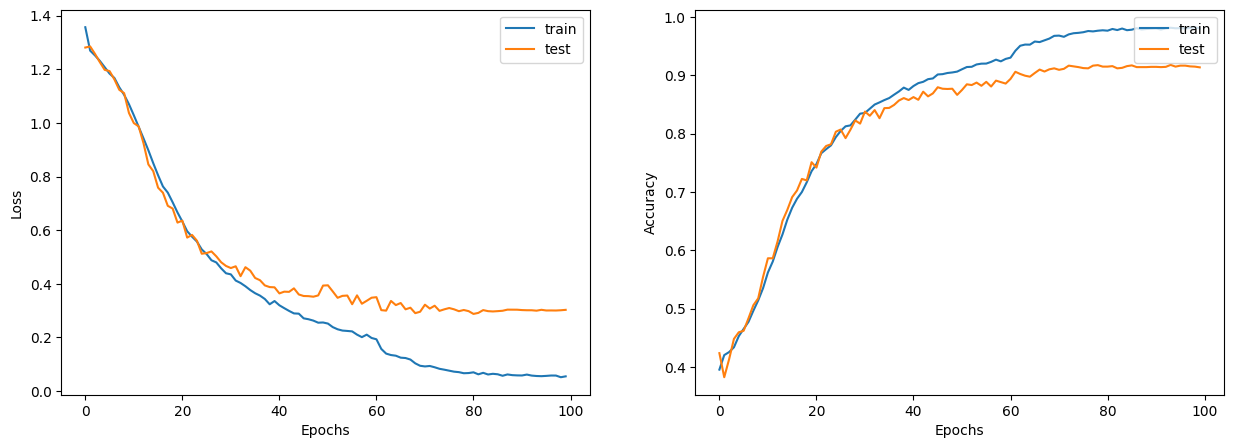

In [ ]:
 display_learning_curves(history)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


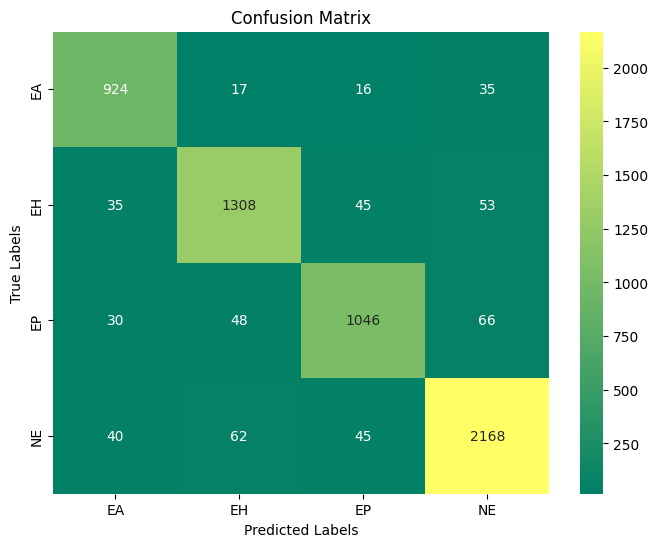

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = gmlp_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="summer",
            xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = gmlp_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Compute accuracy
accuracy = np.trace(confusion_mtx) / np.sum(confusion_mtx)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score for each class
class_report = classification_report(y_test, y_pred_classes, target_names=CATEGORIES)
print(class_report)


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Accuracy: 0.9171438194678343
              precision    recall  f1-score   support

          EA       0.90      0.93      0.91       992
          EH       0.91      0.91      0.91      1441
          EP       0.91      0.88      0.89      1190
          NE       0.93      0.94      0.94      2315

    accuracy                           0.92      5938
   macro avg       0.91      0.91      0.91      5938
weighted avg       0.92      0.92      0.92      5938



186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


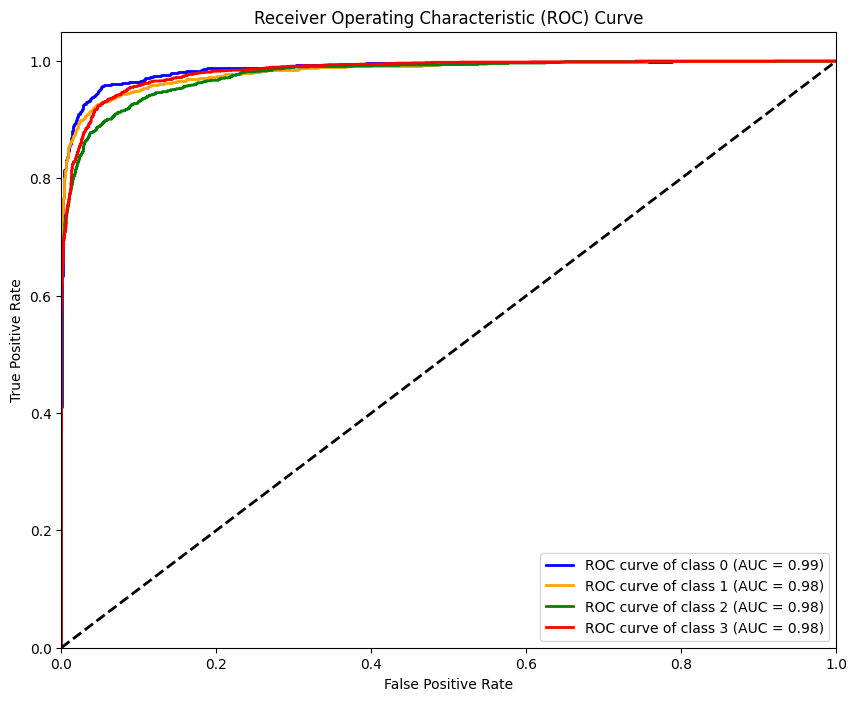

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))

# Predict probabilities for the test set
y_pred_prob = gmlp_classifier.predict(x_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

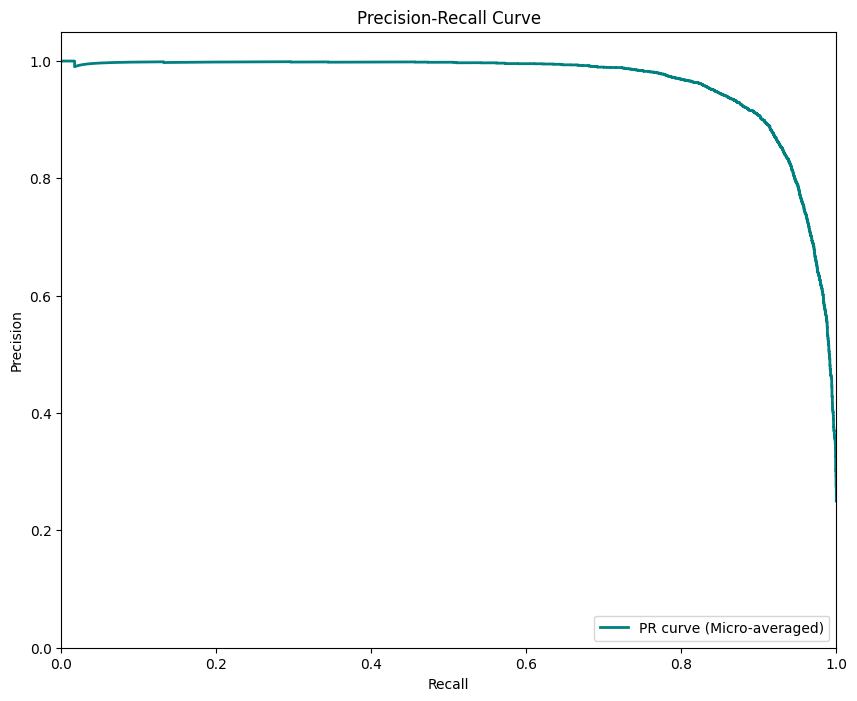

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds using "micro" averaging
precision_micro, recall_micro, thresholds_micro = precision_recall_curve(y_test_one_hot.ravel(), y_pred_prob.ravel())

# Plot the Precision-Recall curve for the model
plt.figure(figsize=(10, 8))
plt.plot(recall_micro, precision_micro, color='teal', lw=2, label='PR curve (Micro-averaged)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

new model


In [ ]:
def build_classifier(blocks, positional_encoding=False):
    inputs = layers.Input(shape=input_shape)

    # Step 1: Apply data augmentation
    x = data_augmentation(inputs)

    # Step 2: CNN feature extractor (can replace with ResNet50 or custom)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Now resize to match expected gMLP input shape (e.g., 128×128)
    x = layers.Resizing(image_size, image_size)(x)

    # Step 3: Extract patches
    patches = Patches(patch_size, num_patches)(x)

    # Step 4: Linear projection to embedding dim
    x = layers.Dense(units=embedding_dim)(patches)

    # Step 5: Optional positional encoding
    if positional_encoding:
        positions = tf.range(start=0, limit=num_patches, delta=1)
        position_embedding = layers.Embedding(input_dim=num_patches, output_dim=embedding_dim)(positions)
        x = x + position_embedding

    # Step 6: gMLP Blocks
    x = blocks(x)

    # Step 7: Pooling
    representation = layers.GlobalAveragePooling1D()(x)

    # Step 8: Dropout + classification
    representation = layers.Dropout(rate=dropout_rate)(representation)
    logits = layers.Dense(num_classes)(representation)

    return keras.Model(inputs=inputs, outputs=logits)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
gmlp_blocks = keras.Sequential(
    [gMLPLayer(num_patches, embedding_dim, dropout_rate) for _ in range(num_blocks)]
)
learning_rate = 0.0005
gmlp_classifier = build_classifier(gmlp_blocks)
gmlp_classifier.summary()
history = run_experiment(gmlp_classifier)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patches_1 (Patches)             │ (None, 256, 4096)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256, 256)       │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (None, 256, 256)       │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,126,027 (8.11 MB)

 Trainable params: 2,126,020 (8.11 MB)

 Non-trainable params: 7 (32.00 B)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 66s 329ms/step - acc: 0.3630 - loss: 1.6759 - top5-acc: 1.0000 - val_acc: 0.4150 - val_loss: 1.2949 - val_top5-acc: 1.0000 - learning_rate: 5.0000e-04
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 317ms/step - acc: 0.4107 - loss: 1.2925 - top5-acc: 1.0000 - val_acc: 0.4221 - val_loss: 1.2753 - val_top5-acc: 1.0000 - learning_rate: 5.0000e-04
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 84s 328ms/step - acc: 0.4211 - loss: 1.2659 - top5-acc: 1.0000 - val_acc: 0.4381 - val_loss: 1.2472 - val_top5-acc: 1.0000 - learning_rate: 5.0000e-04
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 81s 320ms/step - acc: 0.4282 - loss: 1.2494 - top5-acc: 1.0000 - val_acc: 0.4529 - val_loss: 1.2199 - val_top5-acc: 1.0000 - learning_rate: 5.0000e-04
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 321ms/step - acc: 0.4440 - loss: 1.2148 - top5-acc: 1.0000 - val_acc: 0.4499 - val_loss: 1.2202 - val_top5-acc: 1.0000 - learning_rate: 5.0000e-04
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = gmlp_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Compute accuracy
accuracy = np.trace(confusion_mtx) / np.sum(confusion_mtx)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score for each class
class_report = classification_report(y_test, y_pred_classes, target_names=CATEGORIES)
print(class_report)


186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step
Accuracy: 0.9594139440889188
              precision    recall  f1-score   support

          EA       0.96      0.95      0.96       992
          EH       0.96      0.96      0.96      1441
          EP       0.95      0.95      0.95      1190
          NE       0.96      0.97      0.97      2315

    accuracy                           0.96      5938
   macro avg       0.96      0.96      0.96      5938
weighted avg       0.96      0.96      0.96      5938



In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

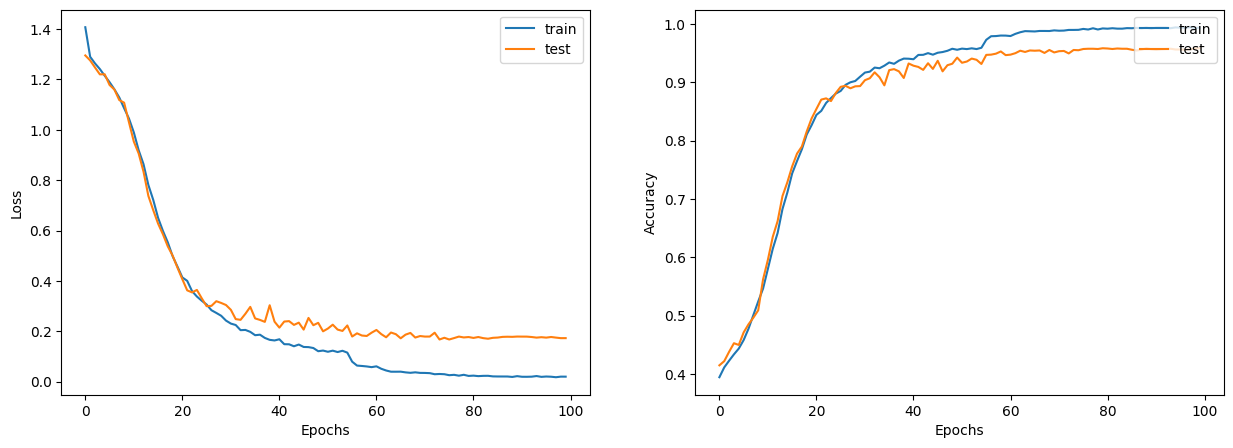

In [ ]:
 display_learning_curves(history)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


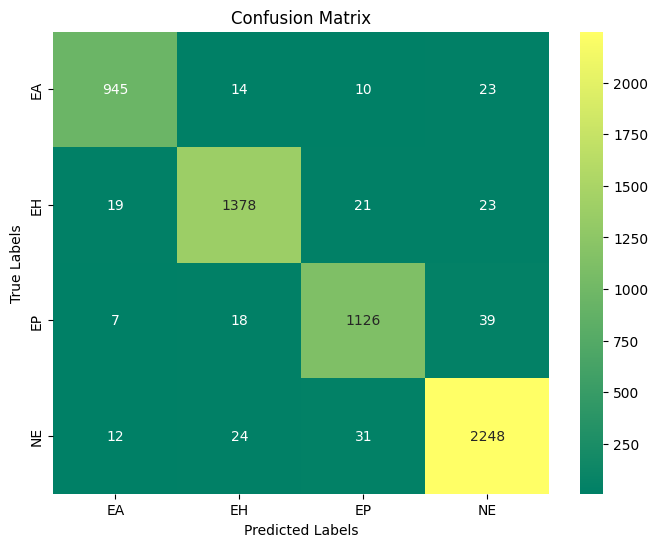

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = gmlp_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="summer",
            xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


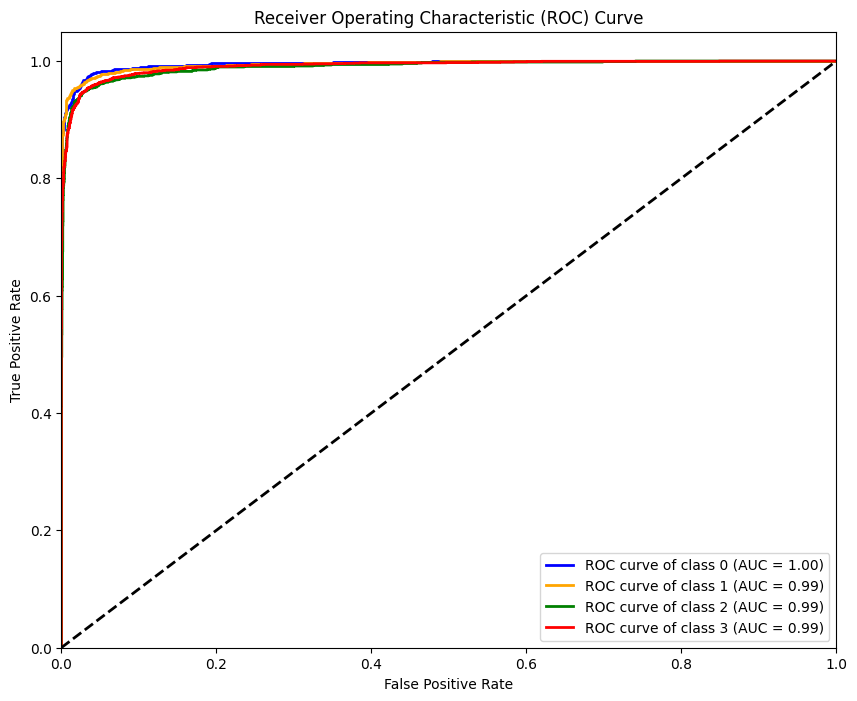

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))

# Predict probabilities for the test set
y_pred_prob = gmlp_classifier.predict(x_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


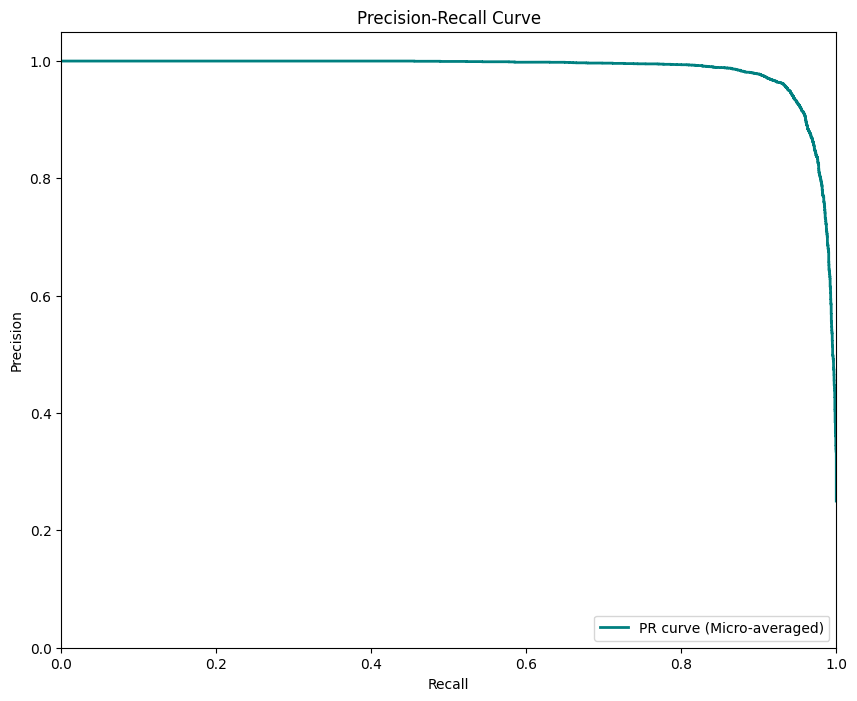

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds using "micro" averaging
precision_micro, recall_micro, thresholds_micro = precision_recall_curve(y_test_one_hot.ravel(), y_pred_prob.ravel())

# Plot the Precision-Recall curve for the model
plt.figure(figsize=(10, 8))
plt.plot(recall_micro, precision_micro, color='teal', lw=2, label='PR curve (Micro-averaged)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()